# Preamble

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress

In [3]:
data = pd.read_csv('/Users/felixkempermann/Desktop/St. Afra/Unterricht/ENSA/Versuch/exports/final_02_without_family.csv')

# Simple Statistics

In [44]:
correlation_df = data.drop(columns=['taxon_name'])
#correlation_df.head()
corr = correlation_df.corr(method='pearson')
corr.head()

,degree,attention_pm,ppi
degree,1.000000,0.239968,-0.000332
attention_pm,0.239968,1.000000,0.816840
ppi,-0.000332,0.816840,1.000000


In [ ]:
most_possible_w = len(data) * len(data)
print(most_possible_w)

sum_interactions = data['attention_pm'].sum()
print(sum_interactions)

print(sum_interactions / most_possible_w)

35423380521
700893972.0
0.01978619662187492


In [ ]:
print(data['ppi'].std())
print(data['ppi'].mean())
print(data['ppi'].median())
print(data['ppi'].min())
print(data['ppi'].max())

11620.040963150146
221.20709992521213
0.0465116279069767
0.0
1946575.875


# Figures

## Early

In [ ]:
# Count how many species have each degree
deg_counts = data['degree'].value_counts().sort_index()
degrees = deg_counts.index.to_numpy()
freq_deg = deg_counts.values

# Count how many species have each attention_pm
att_counts = data['attention_pm'].value_counts().sort_index()
attentions = att_counts.index.to_numpy()
freq_att = att_counts.values


In [ ]:

#    FIT POWER‐LAW TO EACH DISTRIBUTION
#    Model: freq = C * x^(-alpha)
#    ⇒ log(freq) = log(C) - alpha * log(x)

def power_law_fit(x, y, xmin=None):
    # optionally restrict to x >= xmin for fit stability
    if xmin is not None:
        mask = x >= xmin
        x, y = x[mask], y[mask]
    # drop zeros
    mask = (x > 0) & (y > 0)
    x, y = x[mask], y[mask]
    logx = np.log10(x)
    logy = np.log10(y)
    slope, intercept, r, p, stderr = stats.linregress(logx, logy)
    # slope = -alpha
    return slope, intercept


In [20]:

# Fit degree distribution
s_deg, i_deg = power_law_fit(degrees, freq_deg, xmin=1)
# Fit attention distribution
s_att, i_att = power_law_fit(attentions, freq_att, xmin=1)

# Prepare fit curves
fit_deg_x = np.array([degrees.min(), degrees.max()])
fit_deg_y = 10**(i_deg + s_deg * np.log10(fit_deg_x))

fit_att_x = np.array([attentions.min(), attentions.max()])
fit_att_y = 10**(i_att + s_att * np.log10(fit_att_x))


/var/folders/9q/r_qwq8cj7ds1wzjt6wsqm2g80000gn/T/ipykernel_58959/1962450661.py:11: RuntimeWarning: divide by zero encountered in log10
  fit_att_y = 10**(i_att + s_att * np.log10(fit_att_x))


In [47]:

#    PLOT 1: Degree vs. Frequency (log–log)
#    But you described X=Degree, Y=Frequency

plt.figure(figsize=(10, 8))
plt.loglog(degrees, freq_deg, marker='o', linestyle='',
           markersize=4, color='skyblue', alpha=0.6, label='data')
plt.loglog(fit_deg_x, fit_deg_y, linestyle='--', color='red',
           label=f'fit: slope={s_deg:.2f}')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Frequency of Degree (log–log)')
plt.legend()
plt.tight_layout()
plt.savefig("/Users/felixkempermann/Desktop/St. Afra/Unterricht/ENSA/Versuch/exports/figures/03_degree_freq.png", dpi=1000)
plt.close()


In [27]:


#    PLOT 2: Attention vs. Frequency (log–log)
#    As described: X=Attention, Y=Frequency

fit_att_x = np.logspace(np.log10(attentions.min()), np.log10(attentions.max()), 100)
fit_att_y = 10**(i_att + s_att * np.log10(fit_att_x))

plt.figure(figsize=(10,8))
plt.loglog(attentions, freq_att, marker='o', linestyle='',
           markersize=4, color='skyblue', alpha=0.6, label='data')
plt.loglog(fit_att_x, fit_att_y, linestyle='--', color='red',
           label=f'fit: slope={s_att:.2f}')
plt.xlabel('Attention (papers per month)')
plt.ylabel('Frequency')
plt.title('Frequency of Attention (log–log)')
plt.legend()
plt.tight_layout()
plt.savefig("/Users/felixkempermann/Desktop/St. Afra/Unterricht/ENSA/Versuch/exports/figures/03_attention_freq.png", dpi=1000)
plt.close()

/var/folders/9q/r_qwq8cj7ds1wzjt6wsqm2g80000gn/T/ipykernel_58959/2402066738.py:4: RuntimeWarning: divide by zero encountered in log10
  fit_att_x = np.logspace(np.log10(attentions.min()), np.log10(attentions.max()), 100)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/_core/function_base.py:162: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/_core/function_base.py:172: RuntimeWarning: invalid value encountered in add
  y += start


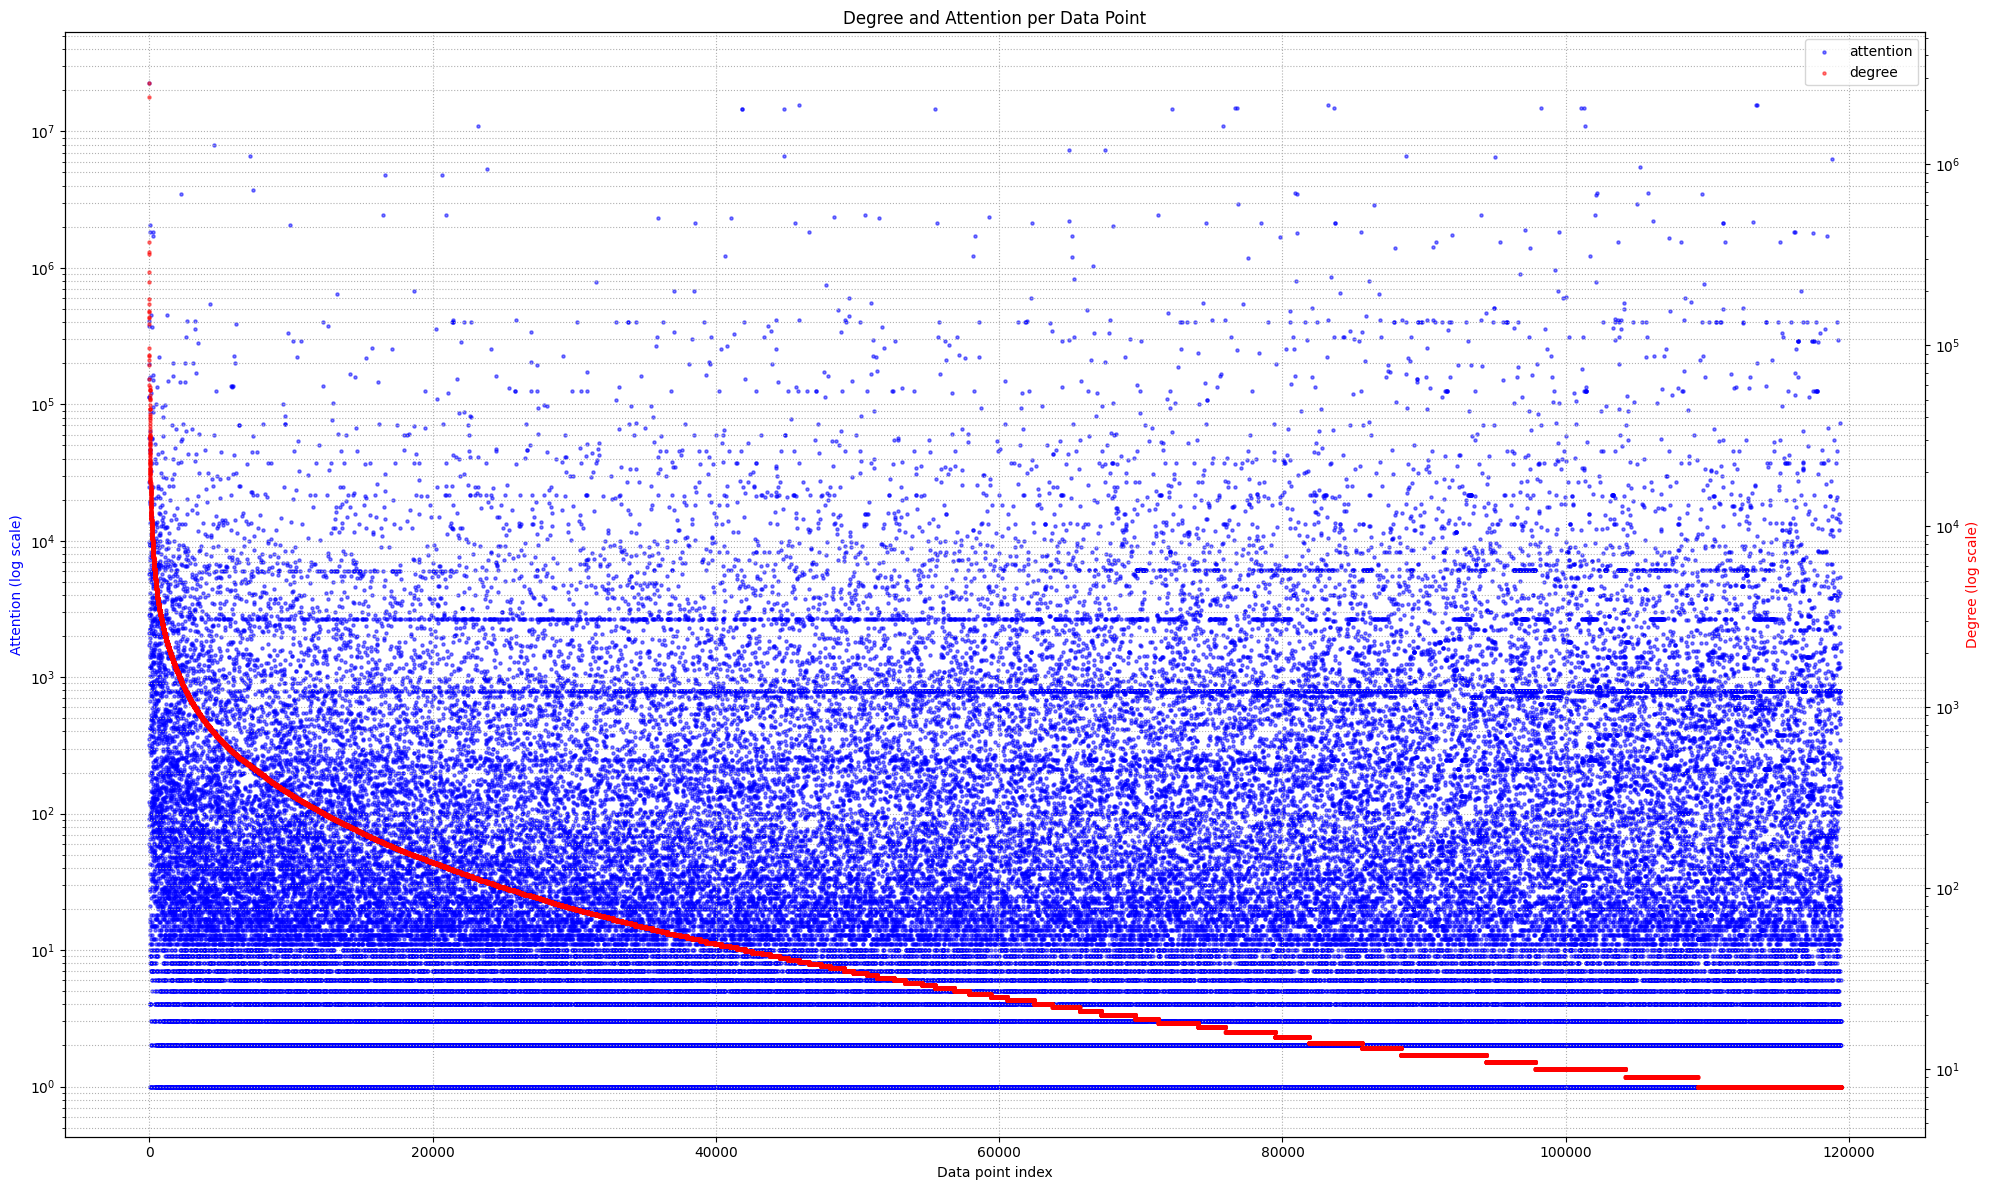

In [ ]:

#    PLOT 3: Both time series on twin y-axes
#    X = data point index (1…N)


import matplotlib as mpl

# Fix OverflowError for high-DPI rendering
mpl.rcParams['agg.path.chunksize'] = 10000

# Filter data to avoid log-scale issues (no zero or negative values)
df_filtered = data[(data['degree'] > 0) & (data['attention_pm'] > 0)].reset_index(drop=True)

# X-axis: data point index (linear)
x = np.arange(1, len(df_filtered) + 1)

plt.figure(figsize=(20, 12))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot attention (left y-axis)
ax1.set_yscale('log')
ax1.scatter(x, df_filtered['attention_pm'], color='blue', alpha=0.5, s=5, label='attention')
ax1.set_ylabel('Attention (log scale)', color='blue')

# Plot degree (right y-axis)
ax2.set_yscale('log')
ax2.scatter(x, df_filtered['degree'], color='red', alpha=0.5, s=5, label='degree')
ax2.set_ylabel('Degree (log scale)', color='red')

# Final formatting
ax1.set_xlabel('Data point index')
ax1.set_title('Degree and Attention per Data Point')
ax1.grid(True, which='both', linestyle=':')

# Combine legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper right')

plt.tight_layout()
plt.savefig("/Users/felixkempermann/Desktop/St. Afra/Unterricht/ENSA/Versuch/exports/figures/03_both.png", dpi=1000)
plt.show()
plt.close()



## Later

In [47]:


# Function to compute p(k) distribution
def compute_pk(values):
    value_counts = values.value_counts().sort_index()
    pk = value_counts / value_counts.sum()
    return pk


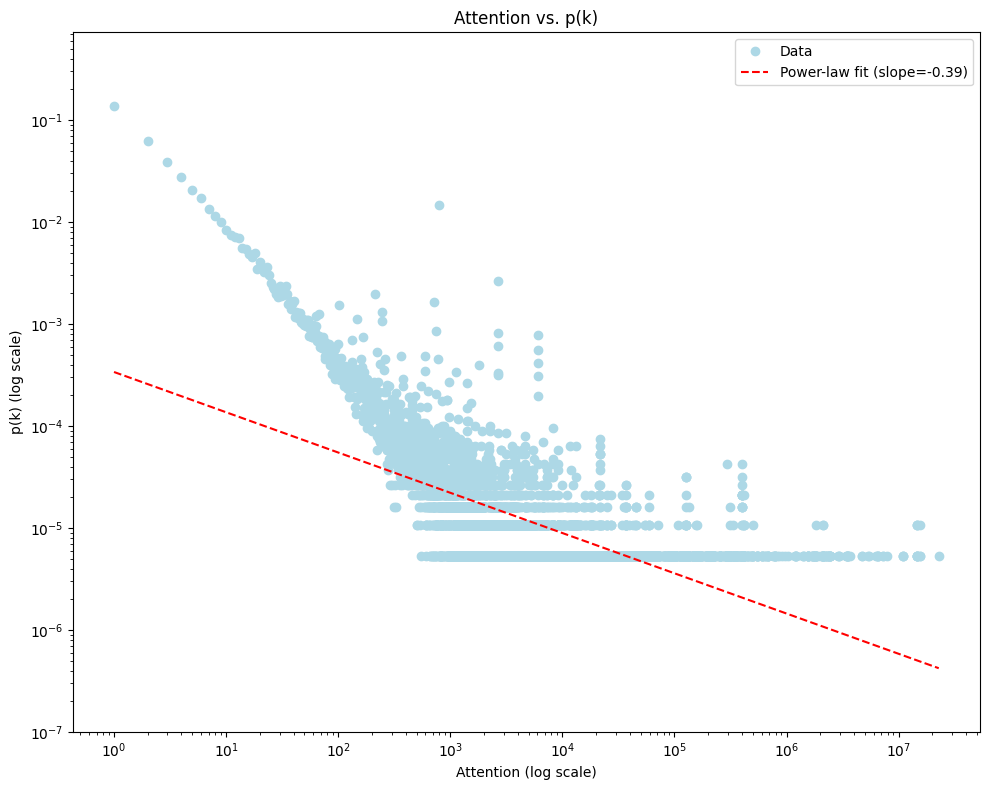

In [48]:

# 1. Plot Attention vs. p(k) (log-log scale)
attention_pk = compute_pk(data['attention_pm'])
plt.figure(figsize=(10,8))
plt.loglog(attention_pk.index, attention_pk.values, 'o', color='lightblue', label='Data')

# Perform linear regression in log-log space
log_x = np.log(attention_pk.index + 1)
log_y = np.log(attention_pk.values + 1e-10)
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
plt.plot(attention_pk.index, np.exp(intercept) * attention_pk.index ** slope, 'r--', label=f'Power-law fit (slope={slope:.2f})')

plt.xlabel("Attention (log scale)")
plt.ylabel("p(k) (log scale)")
plt.title("Attention vs. p(k)")
plt.legend()
plt.ylim(bottom=1e-7)  # Ensure 10e-0 (1) is visible on y-axis
plt.tight_layout()
plt.savefig("/Users/felixkempermann/Desktop/St. Afra/Unterricht/ENSA/Versuch/exports/figures/04_attention_pk.png")


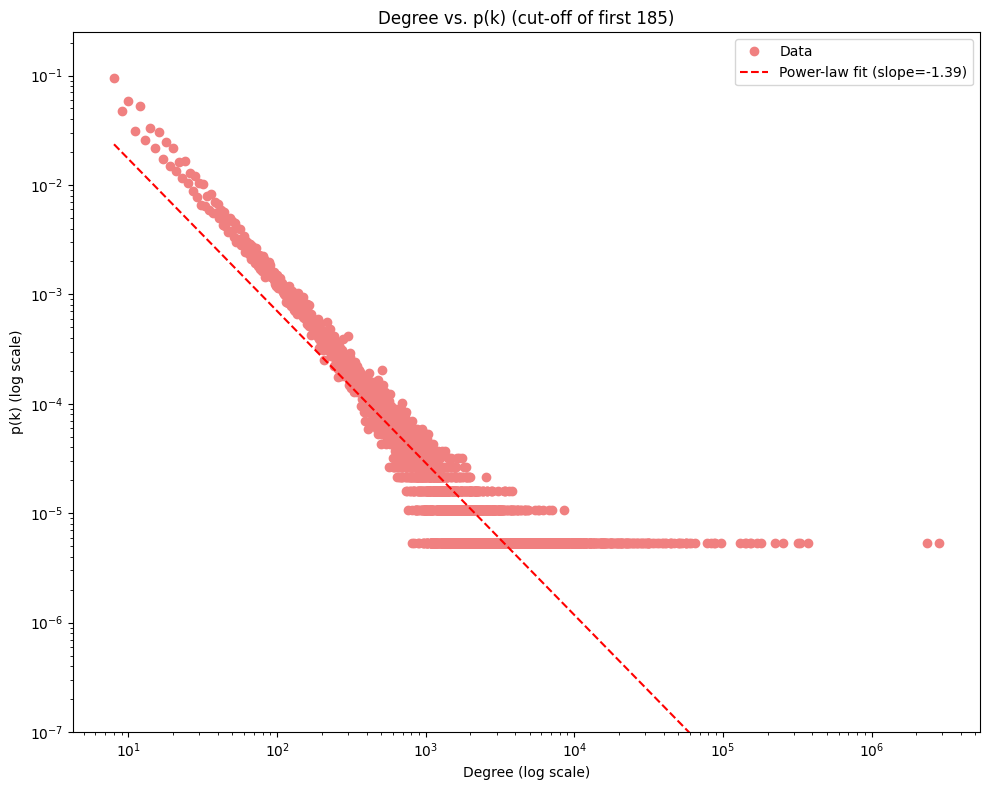

In [49]:

# 2a. Plot Degree vs. p(k) (log-log scale) with cut
degree_pk = compute_pk(data['degree'])
degree_pk_fit = compute_pk(data['degree'][184:]) # cut
plt.figure(figsize=(10,8))
plt.loglog(degree_pk.index, degree_pk.values, 'o', color='lightcoral', label='Data')

log_x = np.log(degree_pk_fit.index + 1)
log_y = np.log(degree_pk_fit.values + 1e-10)
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
plt.plot(degree_pk.index, np.exp(intercept) * degree_pk.index ** slope, 'r--', label=f'Power-law fit (slope={slope:.2f})')

plt.xlabel("Degree (log scale)")
plt.ylabel("p(k) (log scale)")
plt.title("Degree vs. p(k) (cut-off of first 185)")
plt.legend()
plt.ylim(bottom=1e-7)
plt.tight_layout()
plt.savefig("/Users/felixkempermann/Desktop/St. Afra/Unterricht/ENSA/Versuch/exports/figures/04_degree_pk_with_cut.png")


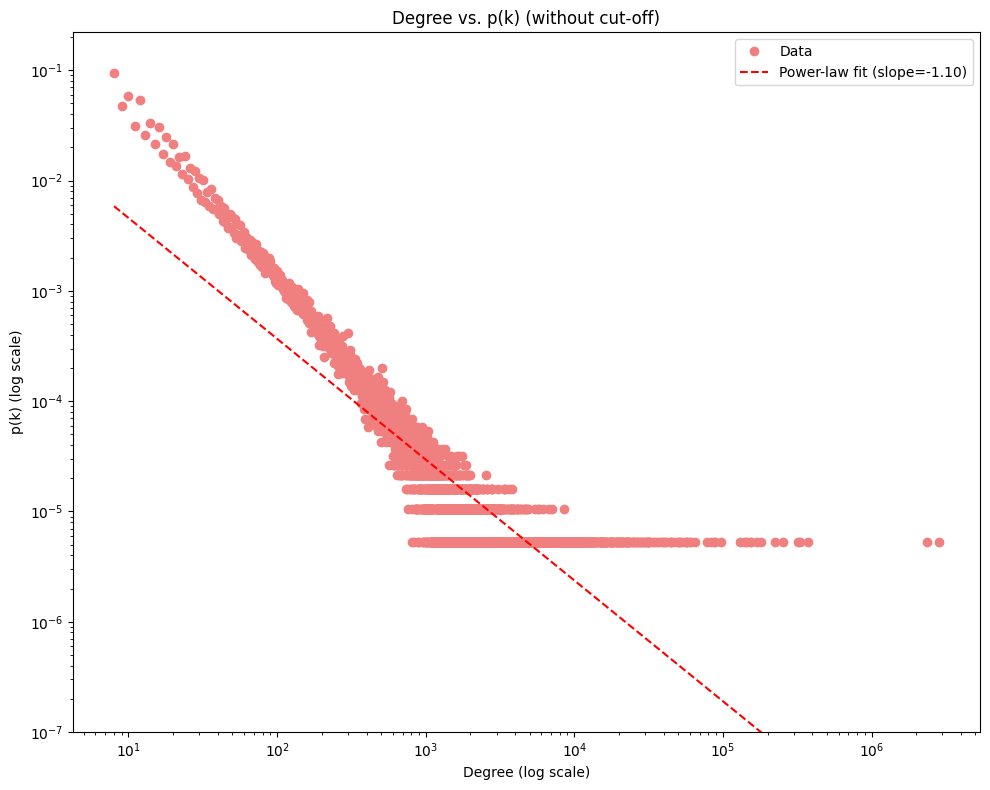

In [50]:
# 2b. Plot Degree vs. p(k) (log-log scale)
degree_pk = compute_pk(data['degree'])
plt.figure(figsize=(10,8))
plt.loglog(degree_pk.index, degree_pk.values, 'o', color='lightcoral', label='Data')

log_x = np.log(degree_pk.index + 1)
log_y = np.log(degree_pk.values + 1e-10)
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
plt.plot(degree_pk.index, np.exp(intercept) * degree_pk.index ** slope, 'r--', label=f'Power-law fit (slope={slope:.2f})')

plt.xlabel("Degree (log scale)")
plt.ylabel("p(k) (log scale)")
plt.title("Degree vs. p(k) (without cut-off)")
plt.legend()
plt.ylim(bottom=1e-7)
plt.tight_layout()
plt.savefig("/Users/felixkempermann/Desktop/St. Afra/Unterricht/ENSA/Versuch/exports/figures/04_degree_pk.png")


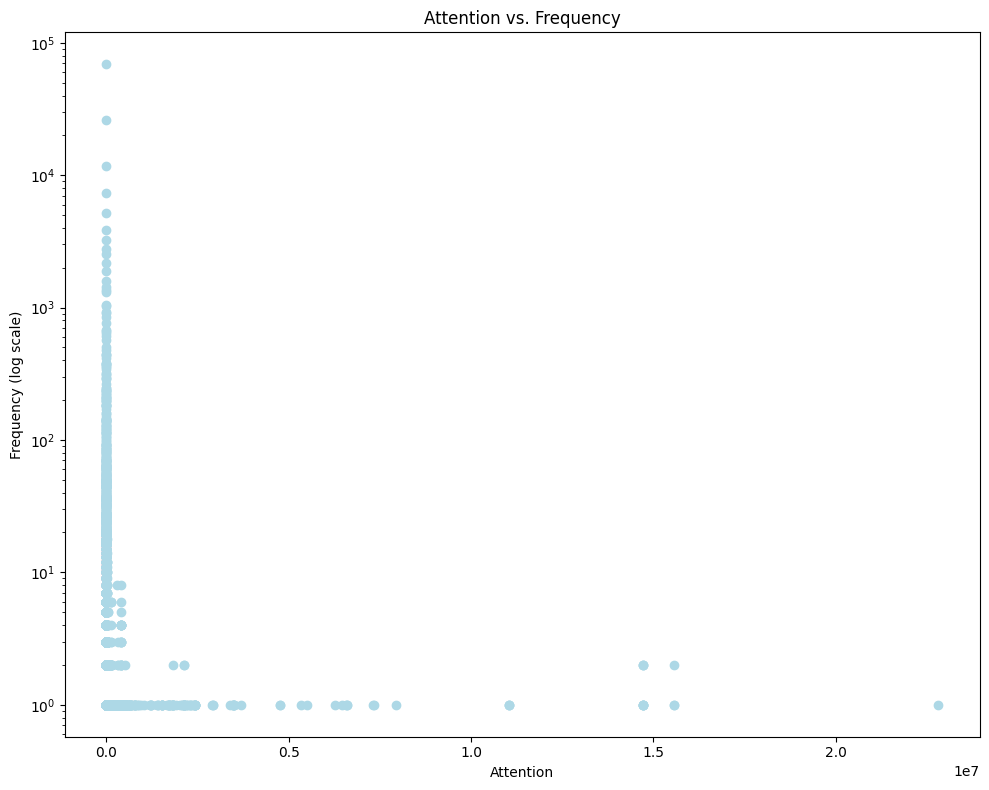

In [51]:

# 3. Plot Attention vs. Frequency (log y-axis)
attention_counts = data['attention_pm'].value_counts().sort_index()
plt.figure(figsize=(10,8))
plt.plot(attention_counts.index, attention_counts.values, 'o', color='lightblue', label='Data')
plt.yscale("log")
plt.xlabel("Attention")
plt.ylabel("Frequency (log scale)")
plt.title("Attention vs. Frequency")
plt.tight_layout()
plt.savefig("/Users/felixkempermann/Desktop/St. Afra/Unterricht/ENSA/Versuch/exports/figures/04_attention_freq_linear.png")


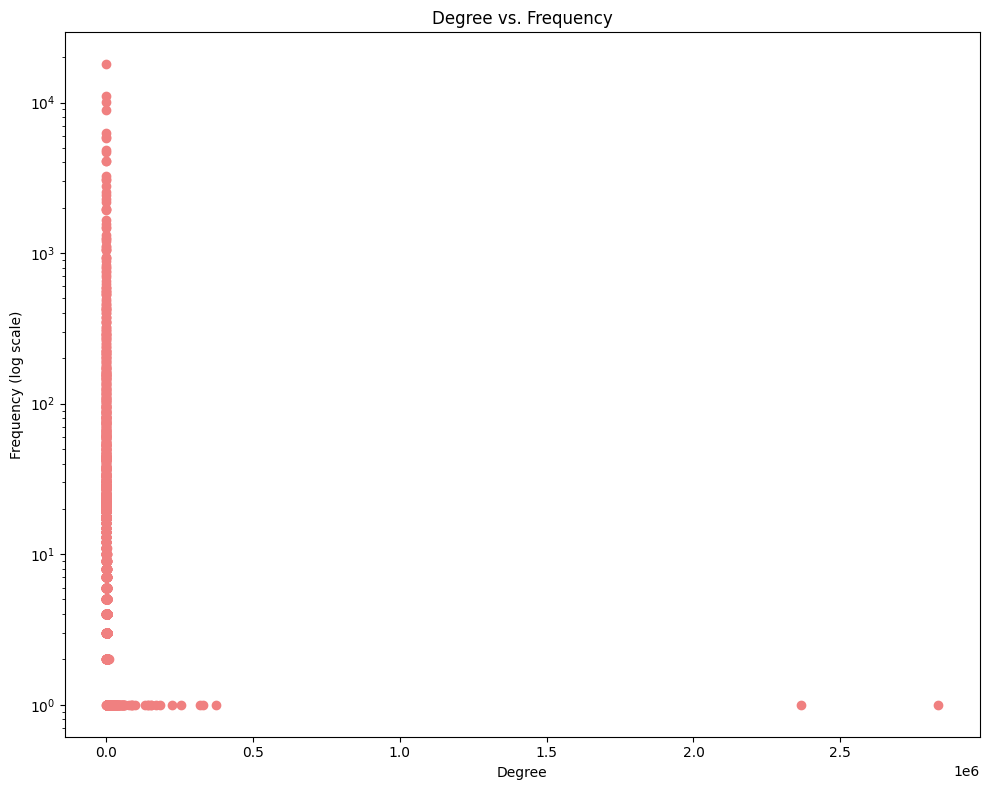

In [52]:

# 4. Plot Degree vs. Frequency (log y-axis)
degree_counts = data['degree'].value_counts().sort_index()
plt.figure(figsize=(10,8))
plt.plot(degree_counts.index, degree_counts.values, 'o', color='lightcoral', label='Data')
plt.yscale("log")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")
plt.title("Degree vs. Frequency")
plt.tight_layout()
plt.savefig("/Users/felixkempermann/Desktop/St. Afra/Unterricht/ENSA/Versuch/exports/figures/04_degree_freq_linear.png")

R_2: 0.00
p-value: 1.05e-49


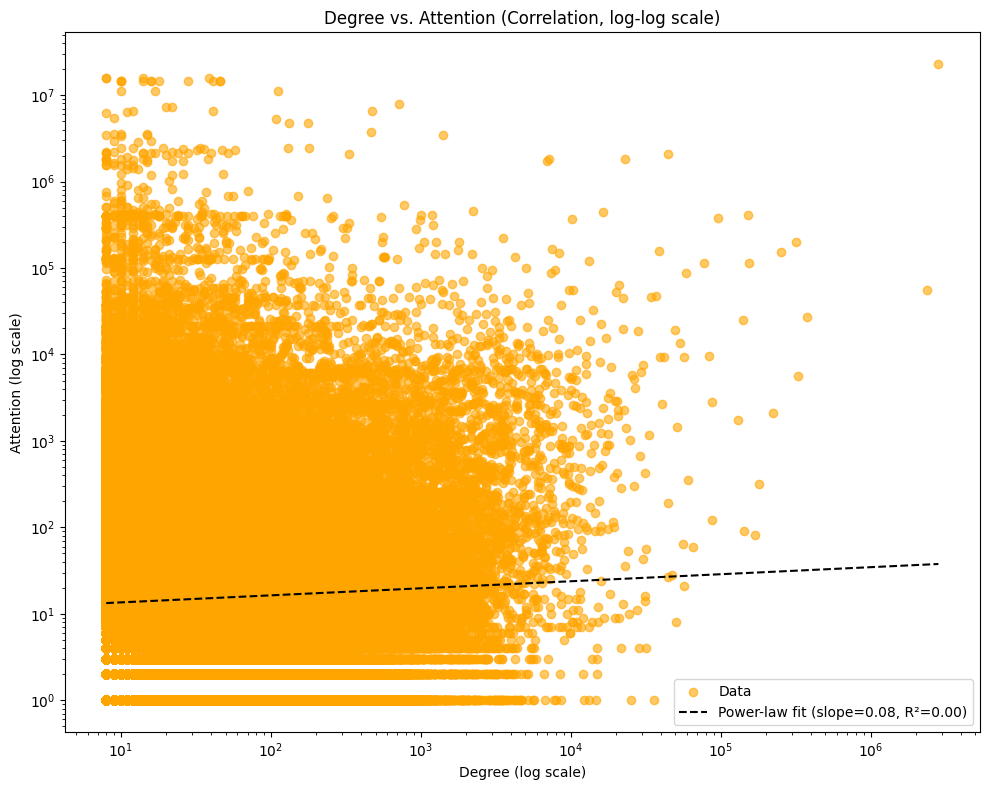

In [53]:
# 5. Plot Degree vs. Attention (correlation) with log-log scale
plt.figure(figsize=(10,8))
plt.scatter(data['degree'], data['attention_pm'], color='orange', alpha=0.6, label='Data')

# Filter out zero or negative values before log transform
mask = (data['degree'] > 0) & (data['attention_pm'] > 0)
log_degree = np.log(data.loc[mask, 'degree'])
log_attention = np.log(data.loc[mask, 'attention_pm'])

# Linear regression in log-log space
slope, intercept, r_value, p_value, std_err = linregress(log_degree, log_attention)

# Regression line for plotting
x_vals = np.linspace(log_degree.min(), log_degree.max(), 100)
y_vals = intercept + slope * x_vals

plt.plot(np.exp(x_vals), np.exp(y_vals), 'k--', label=f'Power-law fit (slope={slope:.2f}, R²={r_value**2:.2f})')

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree (log scale)")
plt.ylabel("Attention (log scale)")
plt.title("Degree vs. Attention (Correlation, log-log scale)")
plt.legend()
plt.tight_layout()
plt.savefig("01_scatterplot_att_deg.png")

print(f"R_2: {r_value**2:.2f}")
print(f"p-value: {p_value:.2e}")